In [299]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json
from sklearn import datasets
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import itertools
from matplotlib import pyplot as plt
import statistics as stt
from random import randint
import os.path


In [4]:
dataset = loadtxt('../csv/pima-indians-diabetes.csv', delimiter=',')
X = dataset[:, 0:8]
y = dataset[:, 8]

In [5]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 0s 1ms/step - loss: 1.6559 - accuracy: 0.5677
Epoch 2/150
77/77 [==============================] - 0s 1ms/step - loss: 0.8574 - accuracy: 0.5833
Epoch 3/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7725 - accuracy: 0.6029
Epoch 4/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7462 - accuracy: 0.6068
Epoch 5/150
77/77 [==============================] - 0s 1ms/step - loss: 0.8240 - accuracy: 0.5807
Epoch 6/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7065 - accuracy: 0.6055
Epoch 7/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.6497
Epoch 8/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.6315
Epoch 9/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6498 - accuracy: 0.6458
Epoch 10/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.6615
Epoch 11/

Epoch 83/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5067 - accuracy: 0.7630
Epoch 84/150
77/77 [==============================] - 0s 979us/step - loss: 0.5132 - accuracy: 0.7396
Epoch 85/150
77/77 [==============================] - 0s 964us/step - loss: 0.5128 - accuracy: 0.7617
Epoch 86/150
77/77 [==============================] - 0s 948us/step - loss: 0.5241 - accuracy: 0.7422
Epoch 87/150
77/77 [==============================] - 0s 993us/step - loss: 0.5540 - accuracy: 0.7370
Epoch 88/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5086 - accuracy: 0.7565
Epoch 89/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5248 - accuracy: 0.7422
Epoch 90/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.7591
Epoch 91/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5110 - accuracy: 0.7552
Epoch 92/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5134 - accuracy:

In [10]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.7812
Accuracy: 78.12


In [27]:
predictions = model.predict_classes(X)

In [28]:
for i in range(10):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.6, 0.201, 30.0] => 0 (expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] => 0 (expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.3, 0.134, 29.0] => 1 (expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] => 1 (expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.232, 54.0] => 0 (expected 1)


In [181]:
X, y = datasets.make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

In [182]:
X = preprocessing.StandardScaler().fit_transform(X)
y = preprocessing.StandardScaler().fit_transform(y.reshape(len(y), 1))[:, 0]
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [183]:
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(lr=0.01, momentum=0.9)

In [165]:
model.compile(loss='mean_squared_error', optimizer=opt)
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

In [162]:
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test.mse))

Train: 0.001, Test: 0.002


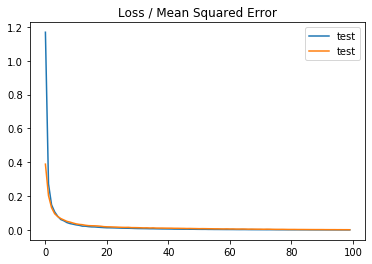

In [163]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='test')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [184]:
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

In [185]:
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.109, Test: 0.130


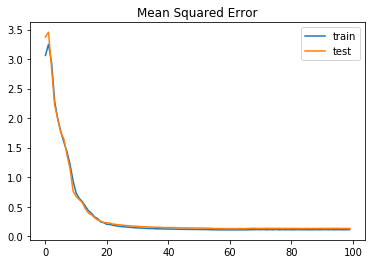

In [188]:
plt.title('Mean Squared Error')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.show()

In [262]:
train_samples = []
train_labels = []
for i in range(50):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [263]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [264]:
model = Sequential([
    Dense(units=16, input_shape=(1, ), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_24 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [265]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [266]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.6872 - accuracy: 0.5905 - val_loss: 0.6790 - val_accuracy: 0.6286
Epoch 2/30
189/189 - 0s - loss: 0.6658 - accuracy: 0.7079 - val_loss: 0.6610 - val_accuracy: 0.6476
Epoch 3/30
189/189 - 0s - loss: 0.6446 - accuracy: 0.7222 - val_loss: 0.6443 - val_accuracy: 0.6762
Epoch 4/30
189/189 - 0s - loss: 0.6233 - accuracy: 0.7476 - val_loss: 0.6257 - val_accuracy: 0.7048
Epoch 5/30
189/189 - 0s - loss: 0.5992 - accuracy: 0.7672 - val_loss: 0.6045 - val_accuracy: 0.7333
Epoch 6/30
189/189 - 0s - loss: 0.5724 - accuracy: 0.7878 - val_loss: 0.5815 - val_accuracy: 0.7381
Epoch 7/30
189/189 - 0s - loss: 0.5432 - accuracy: 0.8042 - val_loss: 0.5564 - val_accuracy: 0.7714
Epoch 8/30
189/189 - 0s - loss: 0.5131 - accuracy: 0.8222 - val_loss: 0.5311 - val_accuracy: 0.7952
Epoch 9/30
189/189 - 1s - loss: 0.4828 - accuracy: 0.8434 - val_loss: 0.5072 - val_accuracy: 0.8048
Epoch 10/30
189/189 - 0s - loss: 0.4537 - accuracy: 0.8534 - val_loss: 0.4828 - val_accuracy: 0.8190

In [268]:
test_samples = []
test_labels = []
for i in range(50):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

In [273]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)
rounded_predictions = np.argmax(predictions, axis=1)
rounded_predictions

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

Confusion matrix, without normalization
[[ 963   87]
 [  49 1001]]


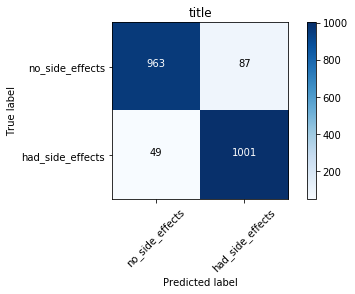

In [278]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('title')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[1:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion Matrix')

In [282]:
if os.path.isfile('../models/medical_trial_model.h5') is False:
    model.save('../models/medical_trial_model.h5')

In [285]:
new_model = load_model('../models/medical_trial_model.h5')
# new_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_24 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [292]:
# Save model architecture only (need to retrain it and compile and get an optimizer)
json_string = model.to_json()
model_architecture = model_from_json(json_string)

In [294]:
# Save model weights
if os.path.isfile('../model/my_model_weights.h5') is False:
    model.save_weights('../models/my_model_weights.h5')

In [297]:
# Need to create a second model with the same architecture to load the model weights
model2 = Sequential([
    Dense(units=16, input_shape=(1, ), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])
model2.load_weights('../models/my_model_weights.h5')
# model2.get_weights()

In [303]:
!kaggle competitions download -c dogs-vs-cats

403 - Forbidden
